Generate Comparative report for all the synthetic data

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from cProfile import label
from matplotlib.pyplot import title

In [49]:
%store -r synthetic_data_mapping
%store -r df1
%store -r df2
%store -r df3
%store -r df4
%store -r df5

In [62]:
class Report:

    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2

    def get_plot_params(self,n_plots):
        n_cols = 3
        n_rows = int(n_plots/n_cols) if (n_plots%n_cols == 0) else int(n_plots/n_cols + 1)
        return n_rows, n_cols

    def generate_plots_numerical(self):
        num_cols = [col for col in self.df1.columns if self.df1.dtypes[col] in ['float64', 'int64']]
        
        n_rows, n_cols = self.get_plot_params(len(num_cols))
        
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(7*n_cols,7*n_rows))
        i,j = 0, 0
        for col in num_cols:
            sns.kdeplot(data=self.df1, ax=ax[i][j], x=col, label="Real")
            sns.kdeplot(data=self.df2, ax=ax[i][j], x=col, label="CTGAN")
            ax[i][j].legend()
            j = (j+1)%3
            if(j==0): i += 1

    def generate_plots_categorical(self):
        cat_cols = [col for col in self.df1.columns if self.df1.dtypes[col] in ['object', 'category']]

        if len(cat_cols) > 1:

            n_rows, n_cols = self.get_plot_params(len(cat_cols))

            fig, ax = plt.subplots(n_rows, n_cols, figsize=(7*n_cols,7*n_rows))
            i,j = 0, 0
            for col in cat_cols:

                # Convert object to categorical type
                self.df1[col] = self.df1[col].astype("category")
                # Plot histogram of real data for each column
                sns.histplot(data=self.df1, ax=ax[i][j], x=col, label="Real", color="grey")

                # Plot histogram of Synthetic data
                sns.histplot(data=self.df2, ax=ax[i][j], x=col, label="CTGAN", color="skyblue")
                # Label histogram for Synthetic Model used
                ax[i][j].legend()
                # Rotate ticks
                ax[i][j].tick_params(labelrotation=90)
                
                j = (j+1)%3
                if(j==0): i += 1
        else:
            pass

    def generate_corr_heatmap(self):
        
        # Correlation Matrix for each feature
        fig, ax = plt.subplots(1, 2, figsize=(15,7))
        corrmat = round(self.df1.corr(), 2)
        top_corr_features = corrmat.index
        #plot heat map
        g=sns.heatmap(self.df1[top_corr_features].corr(), ax=ax[0], annot=False,fmt='.2f',cmap="BuGn")

        corrmat = round(self.df2.corr(), 2)
        top_corr_features = corrmat.index
        #plot heat map
        g=sns.heatmap(self.df2[top_corr_features].corr(), ax=ax[1], annot=False,fmt='.2f',cmap="BuGn")
    

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [50]:
dfs = [df1, df2, df3, df4, df5]
for df in dfs:
    print(df.index.name)

adult
breast_cancer
heart
iris
credit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


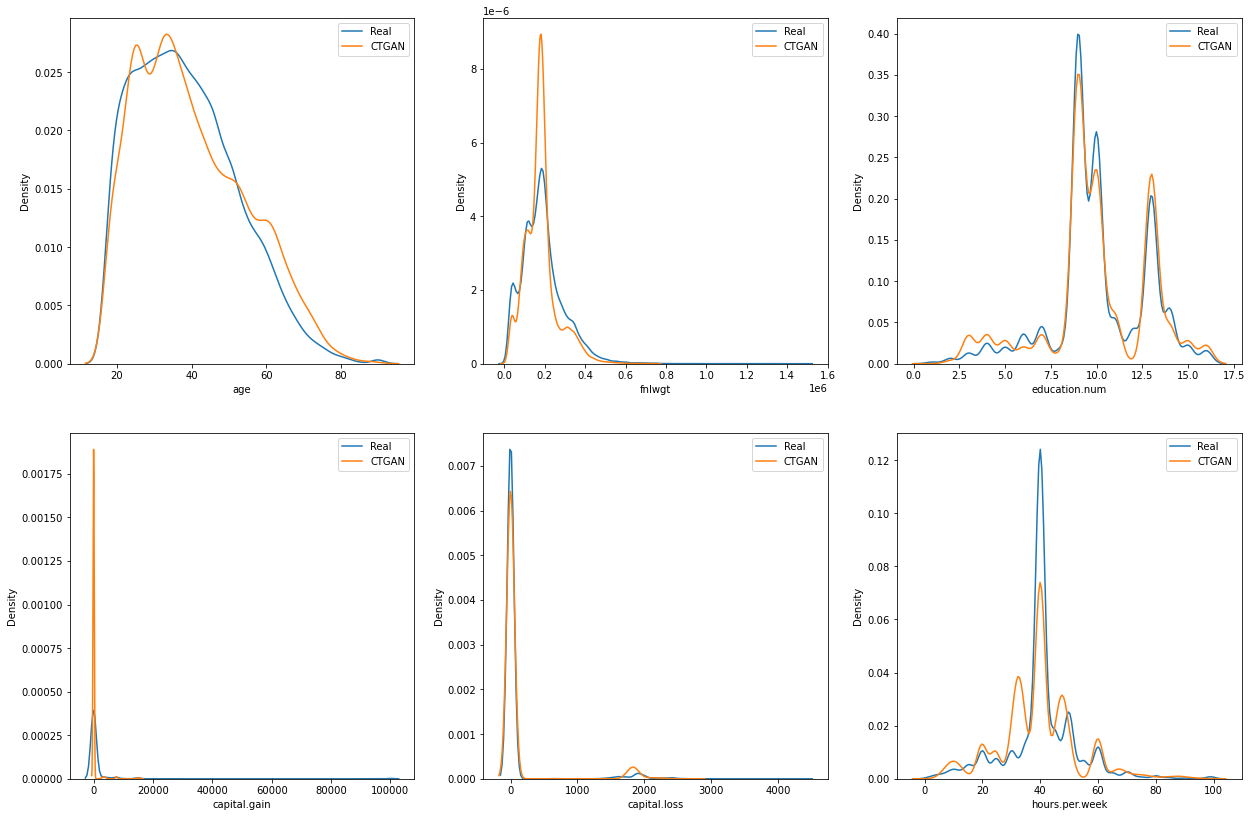

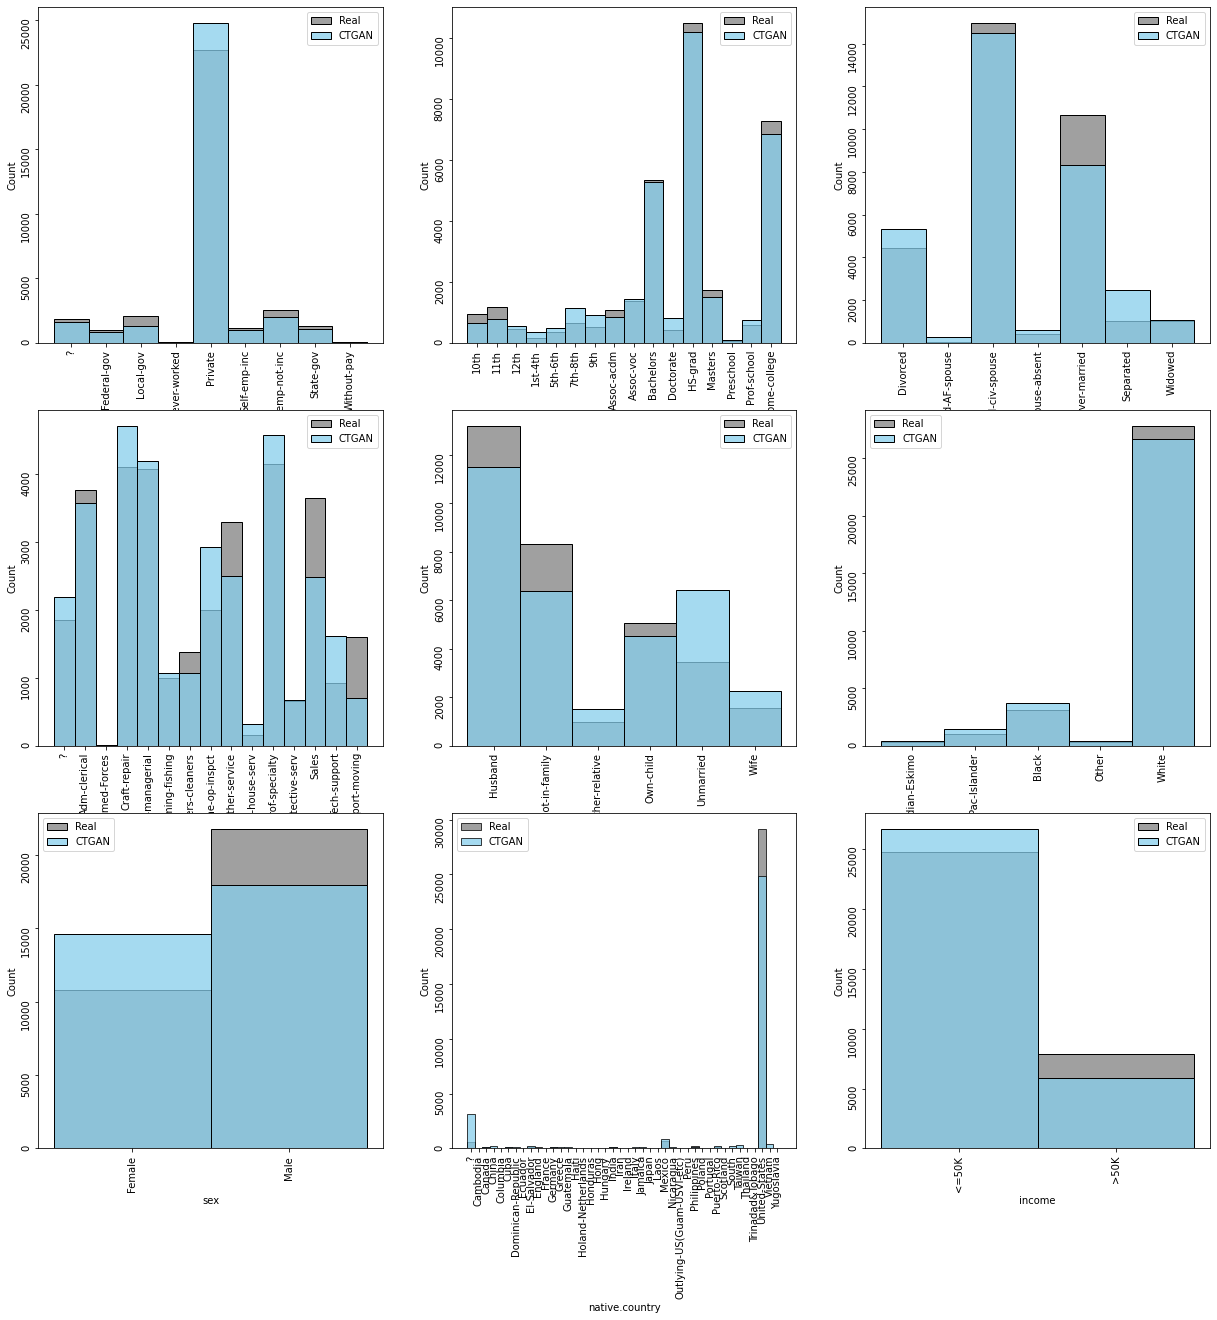

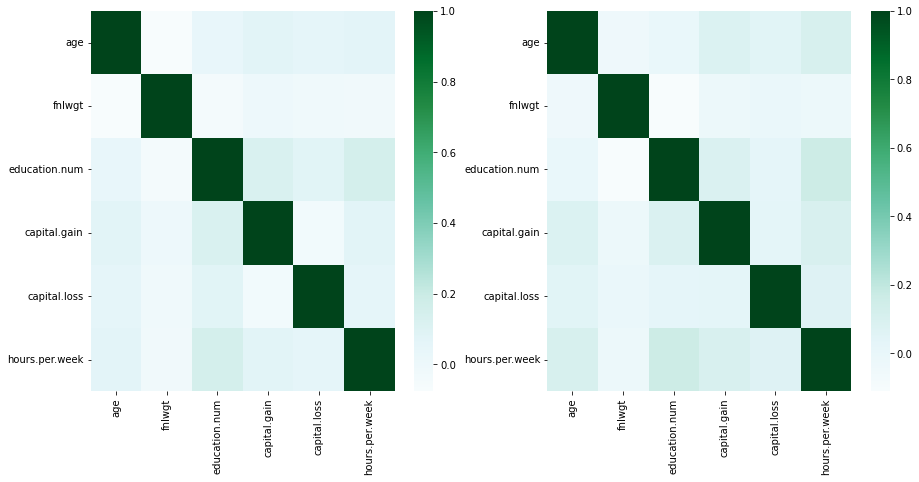

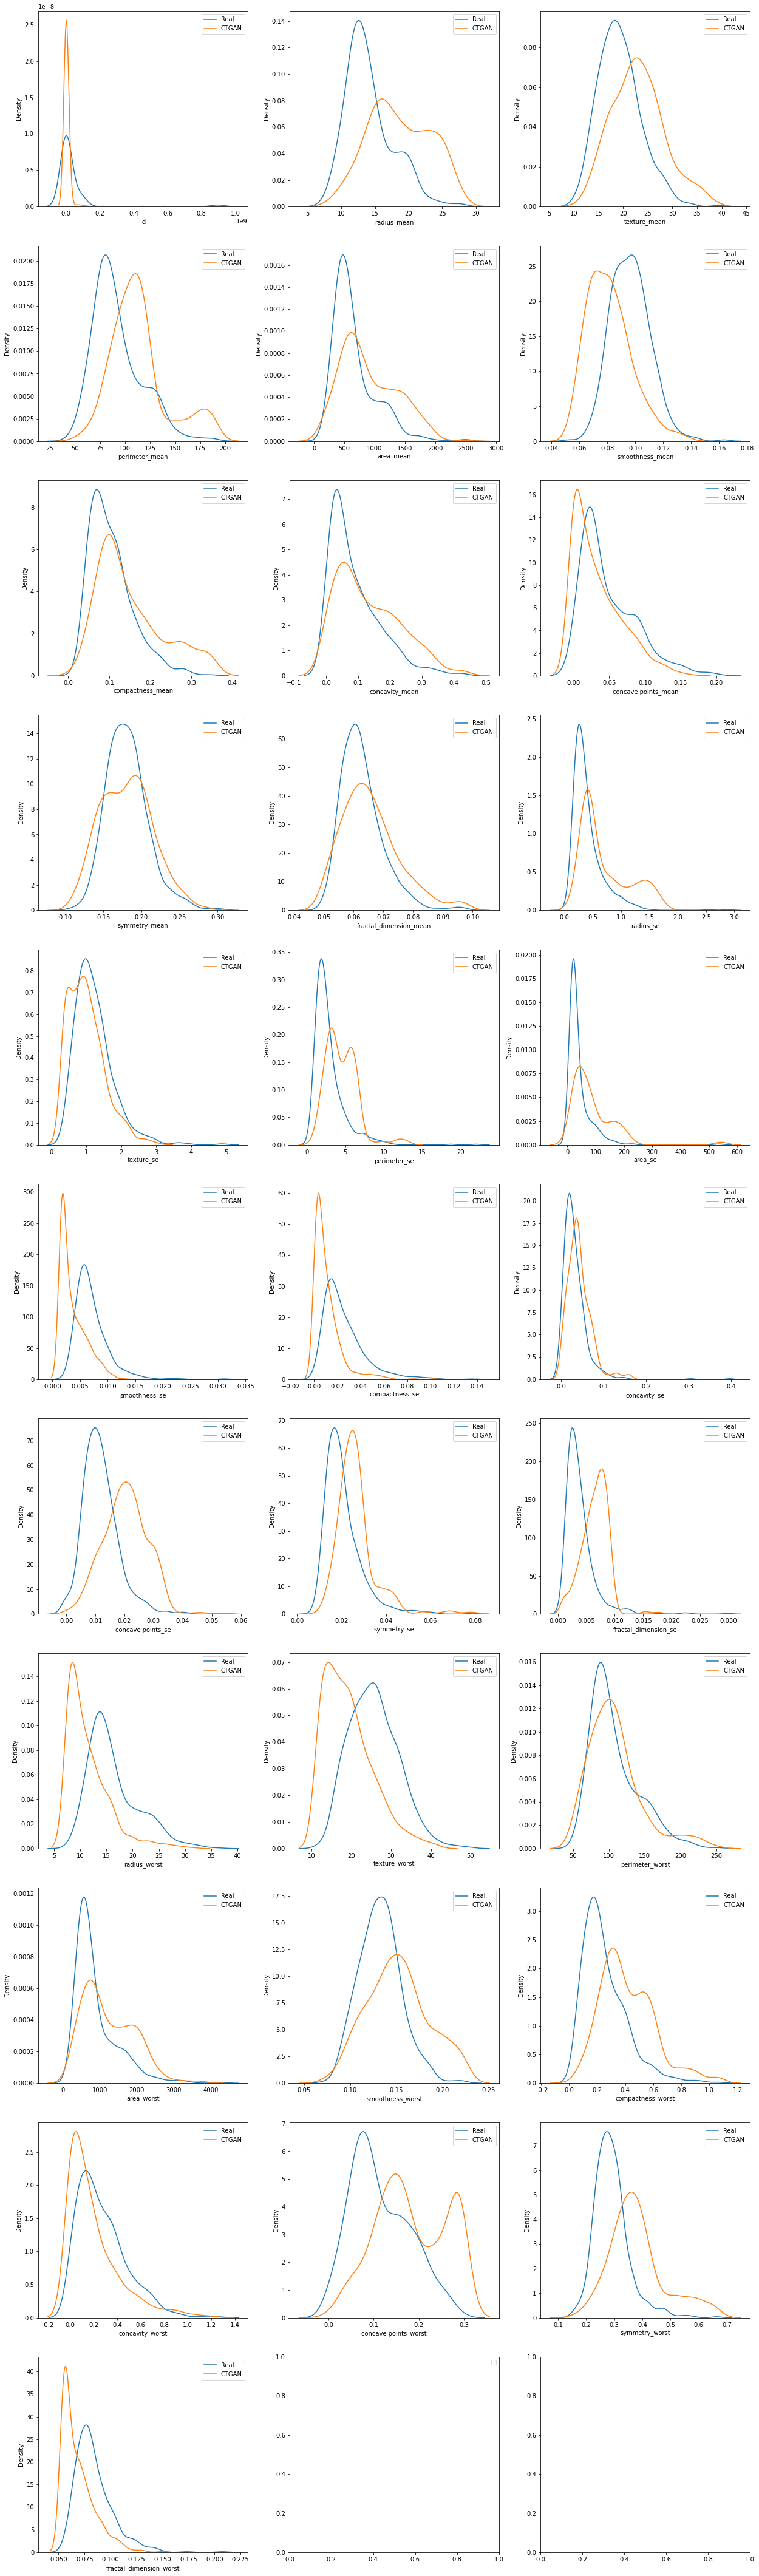

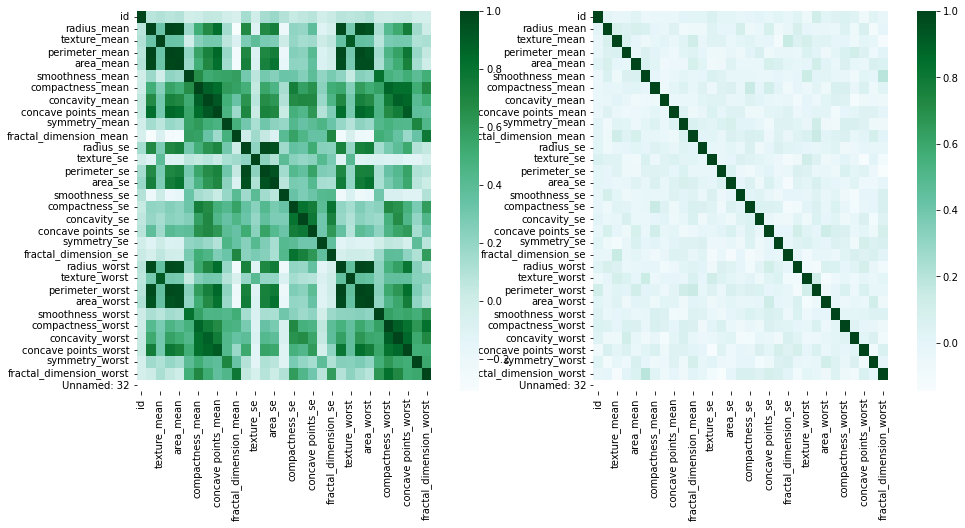

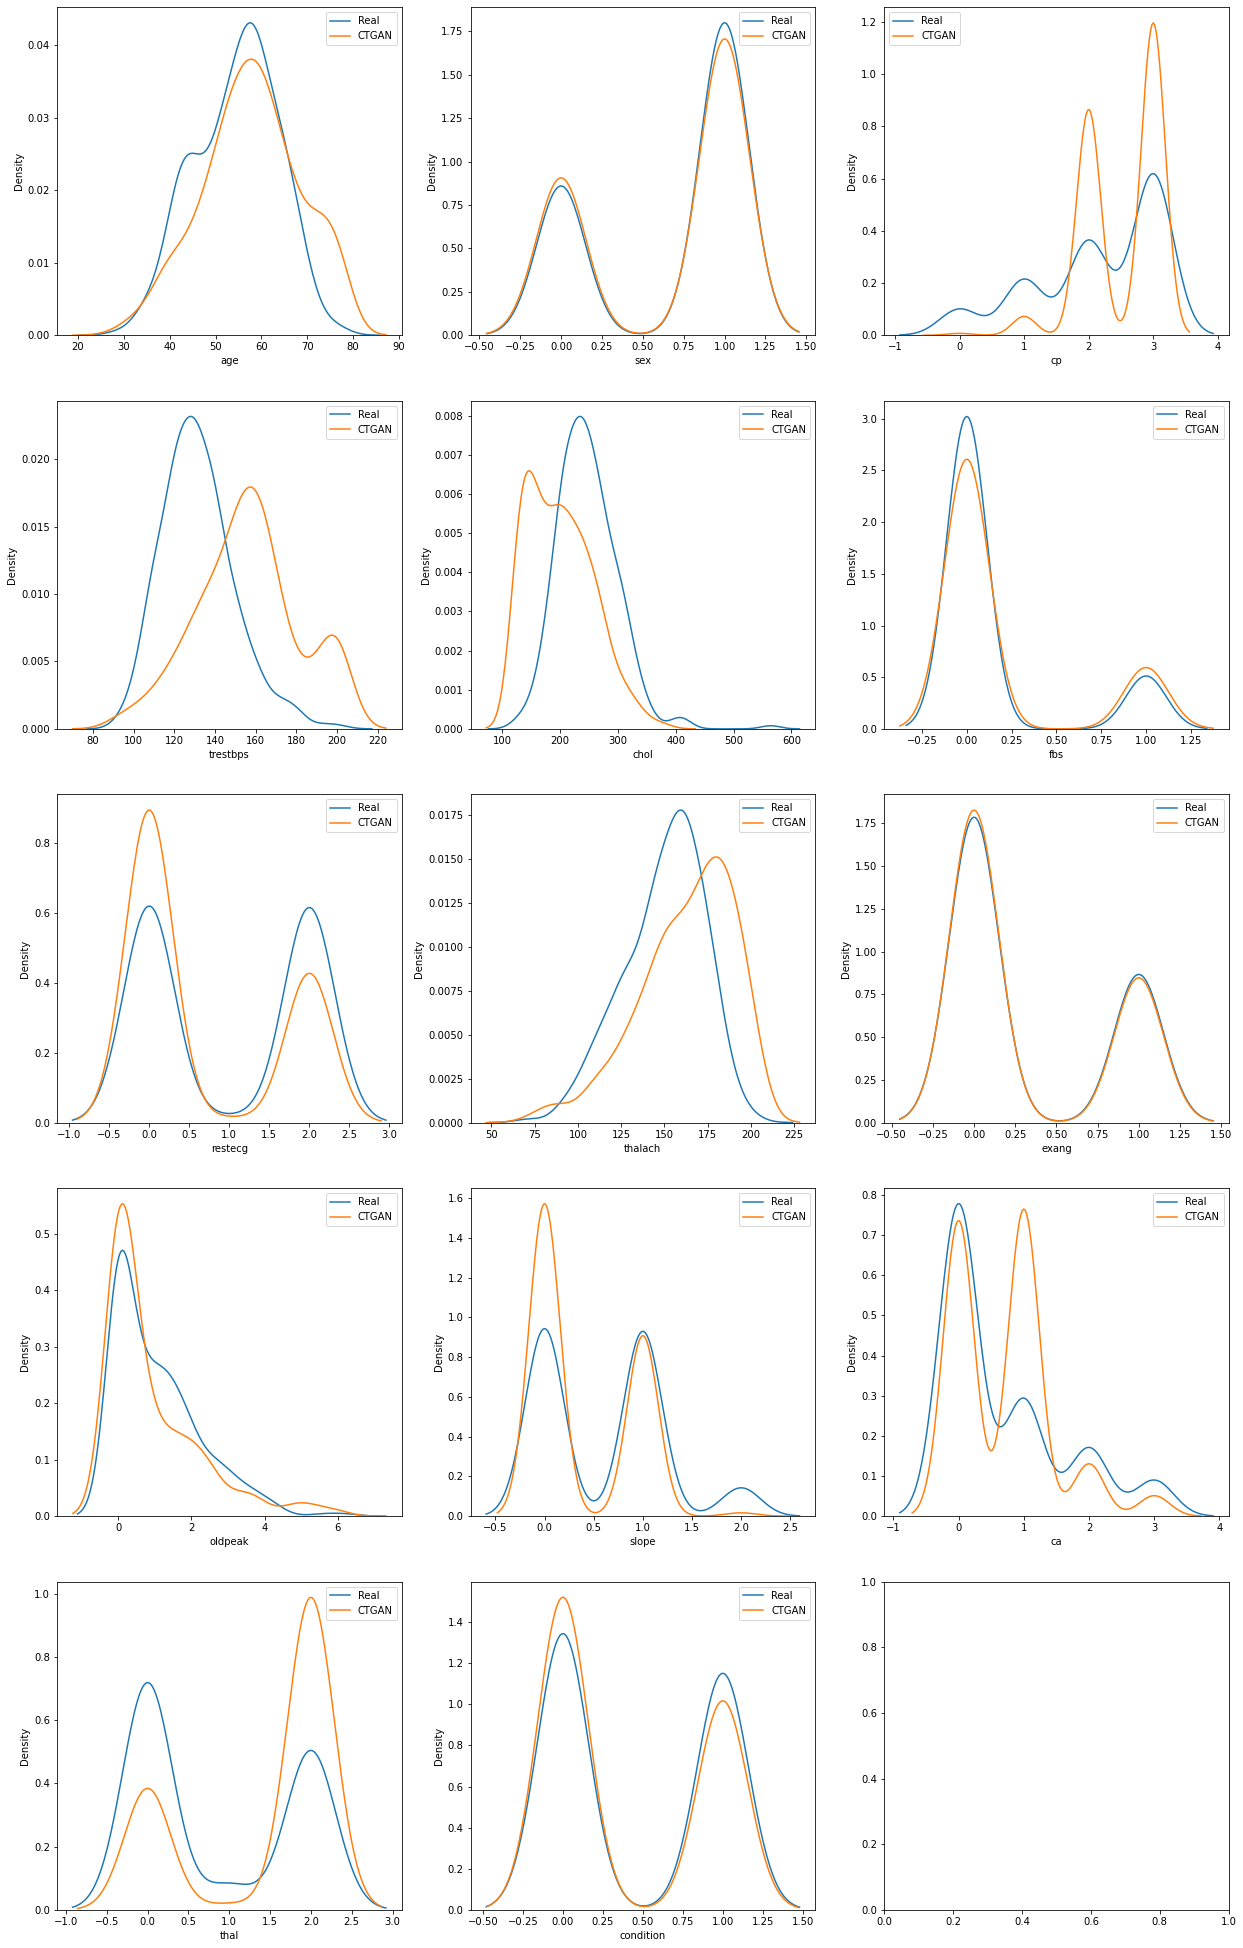

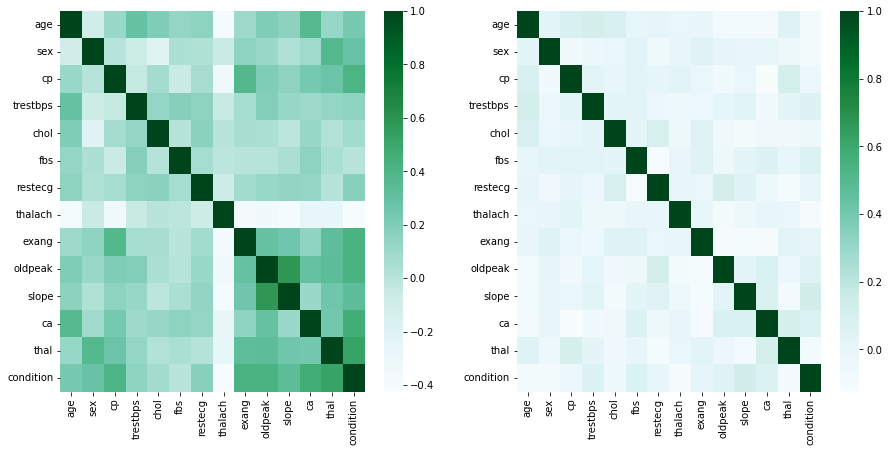

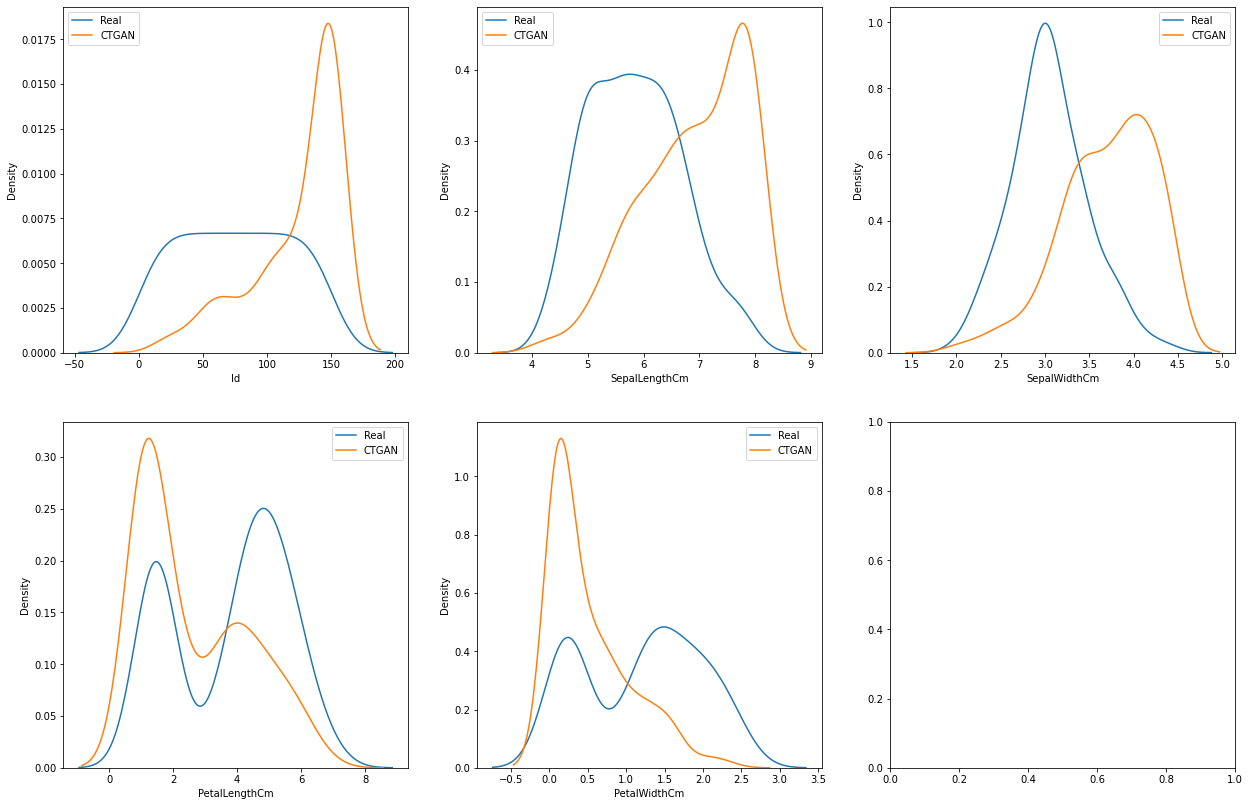

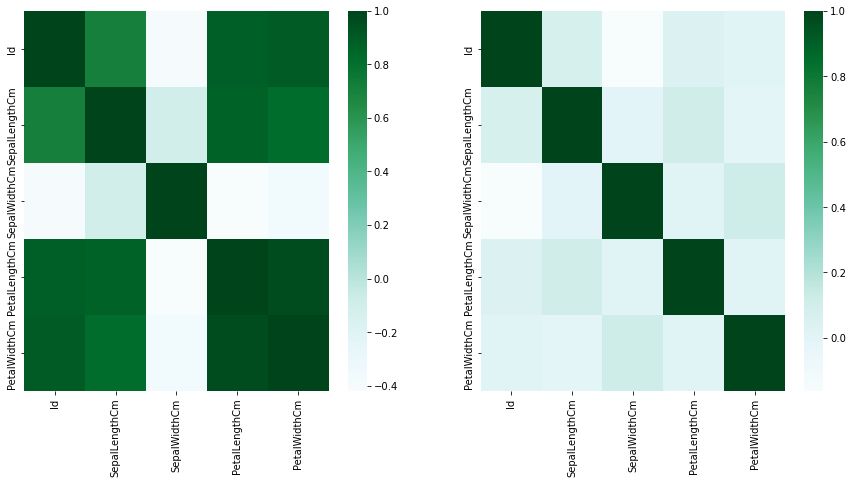

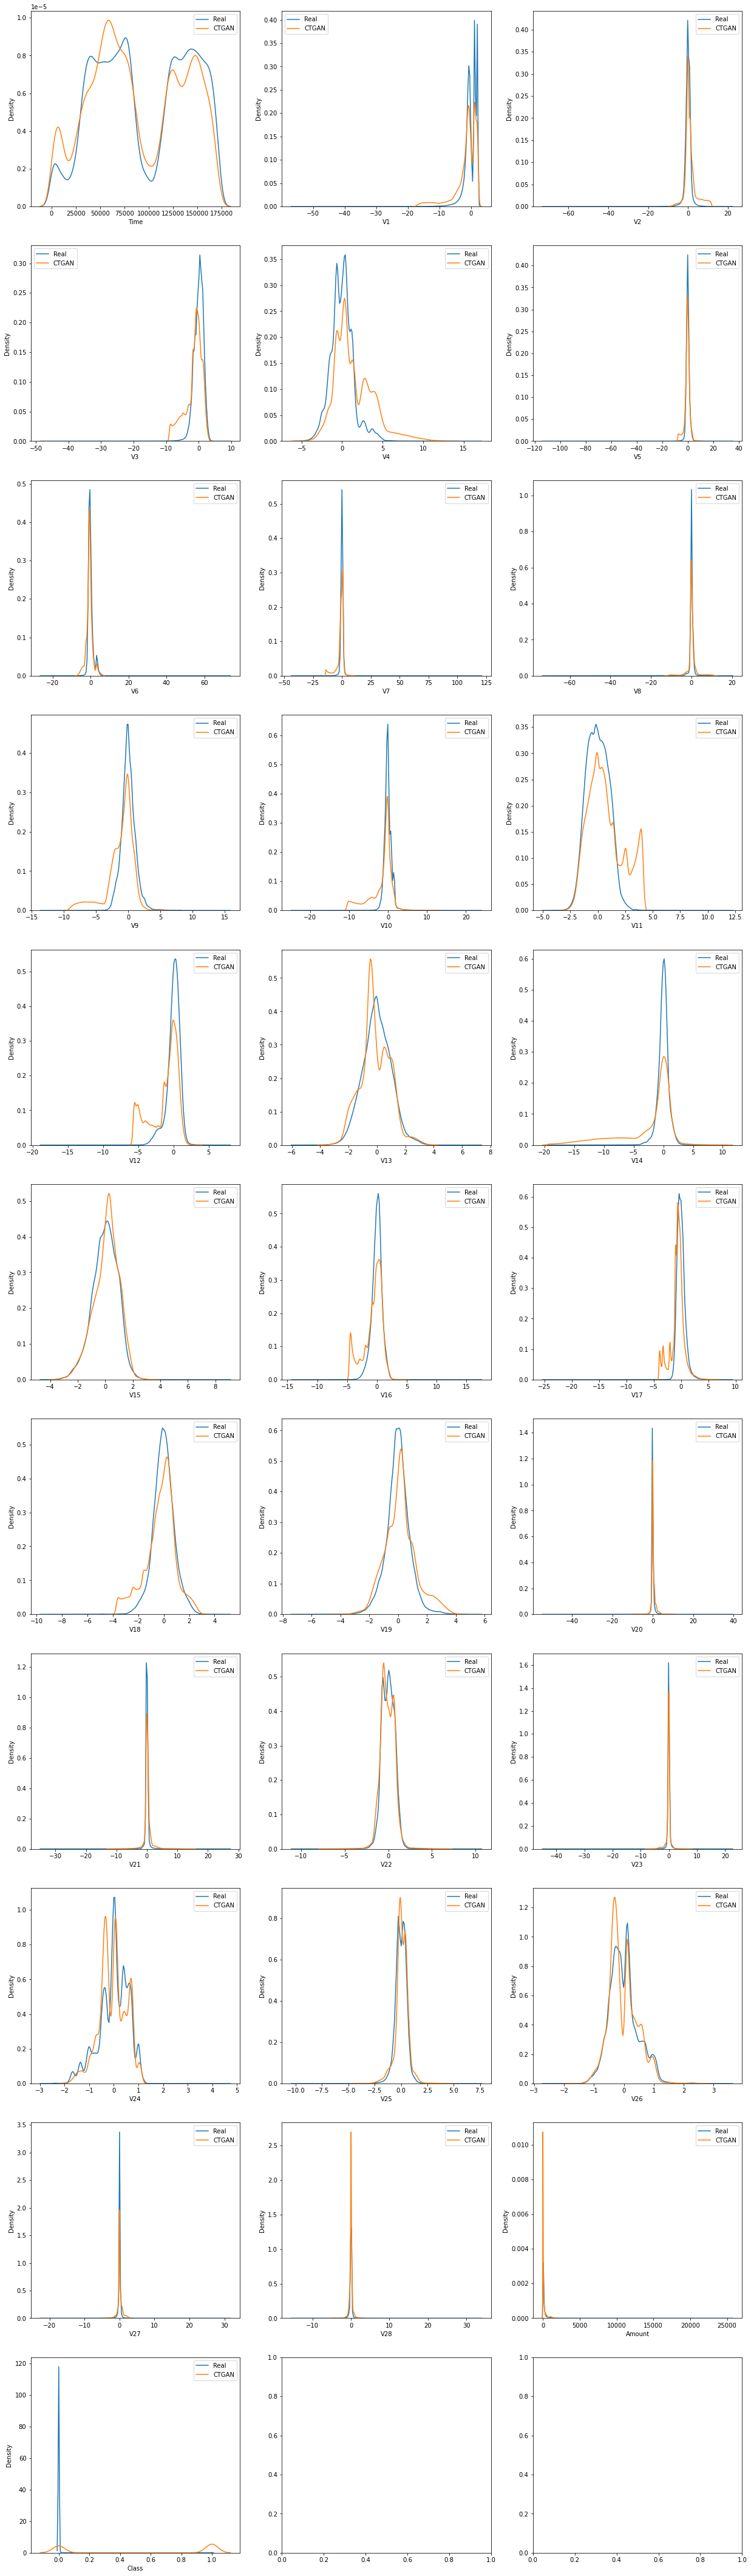

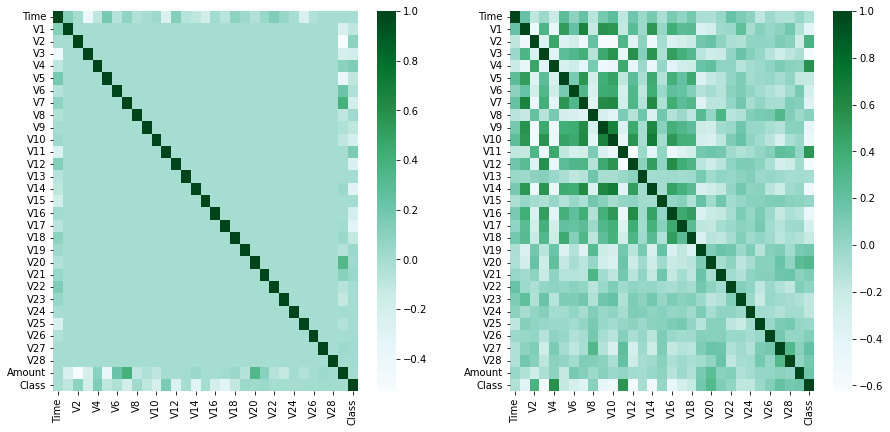

In [63]:
report = []
k = 0
for df in dfs:
    report.append(Report(df, synthetic_data_mapping['syn_'+ df.index.name][0]))
    report[k].generate_plots_numerical()
    report[k].generate_plots_categorical()
    report[k].generate_corr_heatmap()
    k +=1


In [10]:
stats.ks_2samp(df1['age'], synthetic_data_mapping['syn_'+'adult'][0]['age'])

KstestResult(statistic=0.05457449095543743, pvalue=1.3860399500014613e-42)

In [11]:
stats.ks_2samp(df1['age'], synthetic_data_mapping['syn_'+'adult'][1]['age'])

KstestResult(statistic=0.08110930253984827, pvalue=1.3033851965674792e-93)

In [12]:
stats.ks_2samp(synthetic_data_mapping['syn_'+'adult'][0]['age'], synthetic_data_mapping['syn_'+'adult'][1]['age'])

KstestResult(statistic=0.05832130462823626, pvalue=1.4151057458098246e-48)

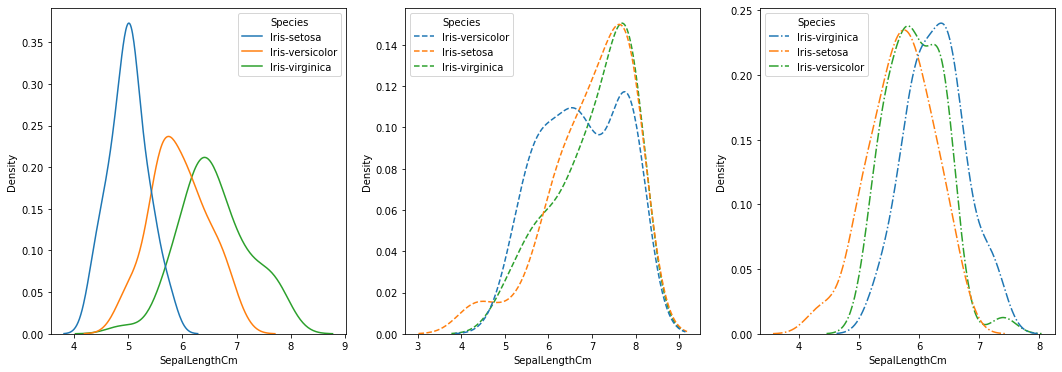

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.kdeplot(data=df4, ax=ax0, x='SepalLengthCm', hue='Species')
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'iris'][0], ax=ax1, x='SepalLengthCm', hue='Species', label='ctgan', ls='--')
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'iris'][1], ax=ax2, x='SepalLengthCm', hue='Species', label='tvae', ls='-.')
plt.show()

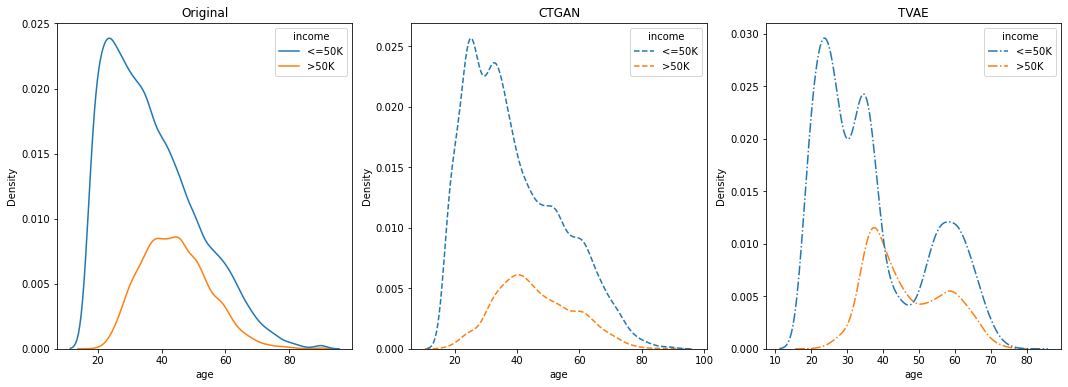

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.kdeplot(data=df1,ax=ax0, x='age', hue='income').set(title="Original")
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'adult'][0],ax=ax1, x='age', hue='income', label='ctgan', ls='--').set(title="CTGAN")
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'adult'][1],ax=ax2, x='age', hue='income', label='tvae', ls='-.').set(title="TVAE")
plt.show()